<a href="https://colab.research.google.com/github/beaasuncion/CCDATSCL_EXERCISES_COM221/blob/main/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [1]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'corona-virus-report' dataset.
Path to dataset files: /kaggle/input/corona-virus-report


In [2]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset

df = pd.read_csv(mydataset)

True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


In [6]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [7]:
# Check the latest date in the df dataset
df["Date"].max()

'2020-07-27'

In [8]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df_global = df.groupby("Date")["Confirmed"].sum().reset_index()
df_global

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


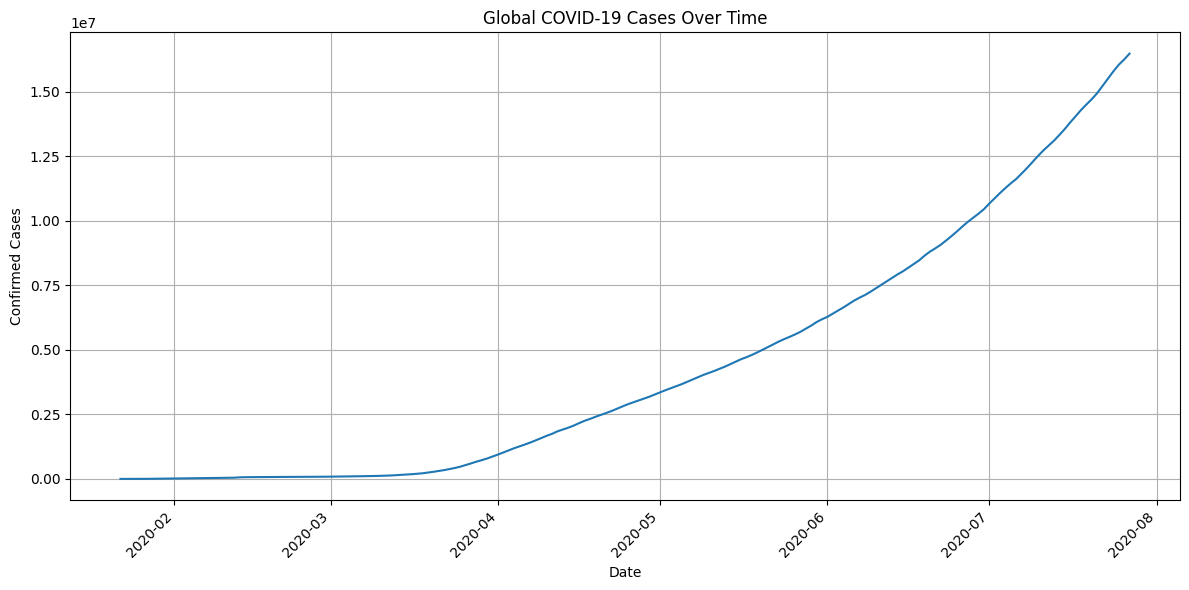

In [11]:
import matplotlib.dates as mdates
plt.figure(figsize=(12, 6))
plt.plot(df_global["Date"], df_global["Confirmed"], linestyle='-')
plt.title("Global COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

In [12]:
df_selected_countries = df.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()
df_us = df_selected_countries[df_selected_countries['Country/Region'] == 'US']
df_china = df_selected_countries[df_selected_countries['Country/Region'] == 'China']
df_russia = df_selected_countries[df_selected_countries['Country/Region'] == 'Russia']

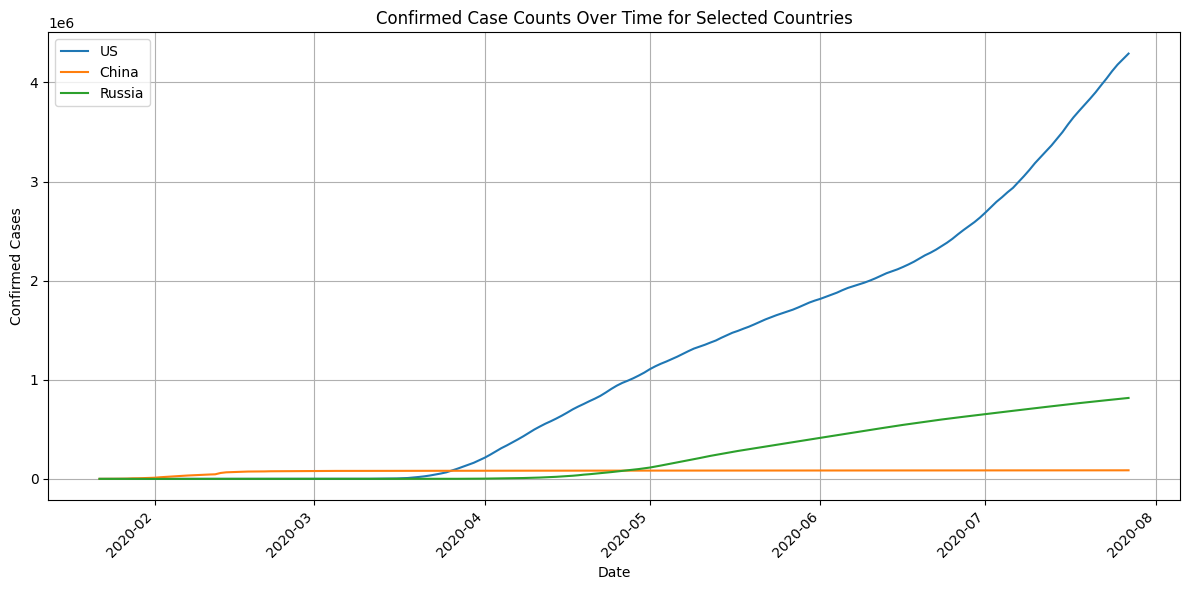

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df_us['Date'], df_us['Confirmed'], label='US', linestyle='-')
plt.plot(df_china['Date'], df_china['Confirmed'], label='China', linestyle='-')
plt.plot(df_russia['Date'], df_russia['Confirmed'], label='Russia', linestyle='-')
plt.title("Confirmed Case Counts Over Time for Selected Countries")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

In [14]:
df_selected_country = df.groupby(['Country/Region', 'Date'])[['Active', 'Recovered']].sum().reset_index()
df_china_recovered_active = df_selected_country[df_selected_country['Country/Region'] == 'China']
df_china_recovered_active

,Country/Region,Date,Active,Recovered
6768,China,2020-01-22,503,28
6769,China,2020-01-23,595,30
6770,China,2020-01-24,858,36
6771,China,2020-01-25,1325,39
6772,China,2020-01-26,1970,49
...,...,...,...,...
6951,China,2020-07-23,2695,78701
6952,China,2020-07-24,2807,78745
6953,China,2020-07-25,2916,78813
6954,China,2020-07-26,3056,78862


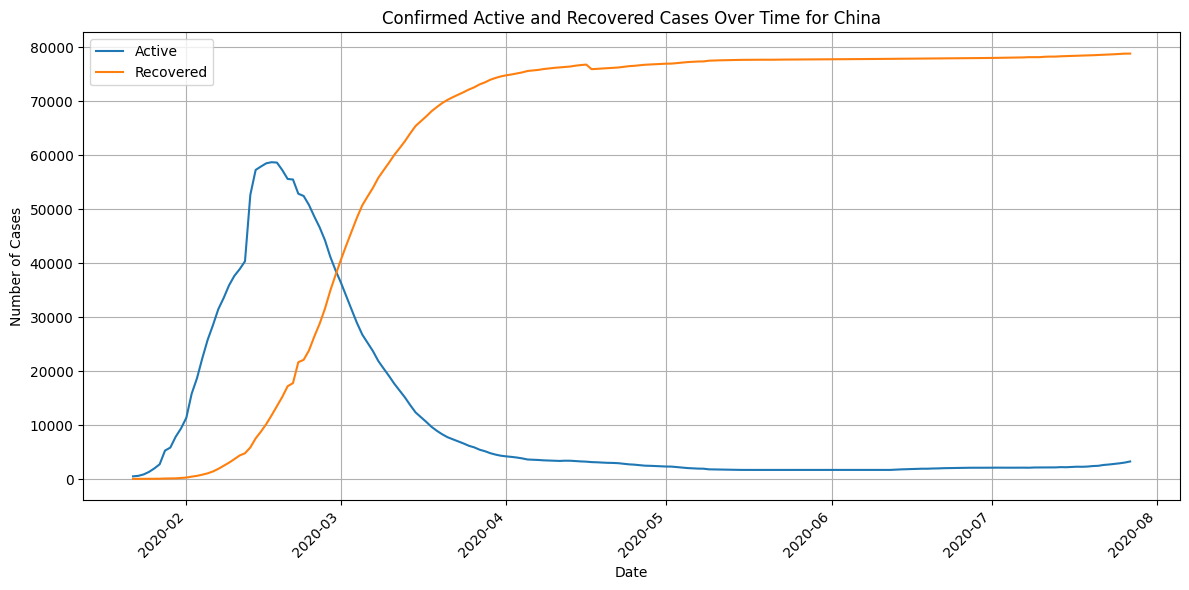

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df_china_recovered_active['Date'], df_china_recovered_active['Active'], label='Active', linestyle='-')
plt.plot(df_china_recovered_active['Date'], df_china_recovered_active['Recovered'], label='Recovered', linestyle='-')
plt.title("Confirmed Active and Recovered Cases Over Time for China")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

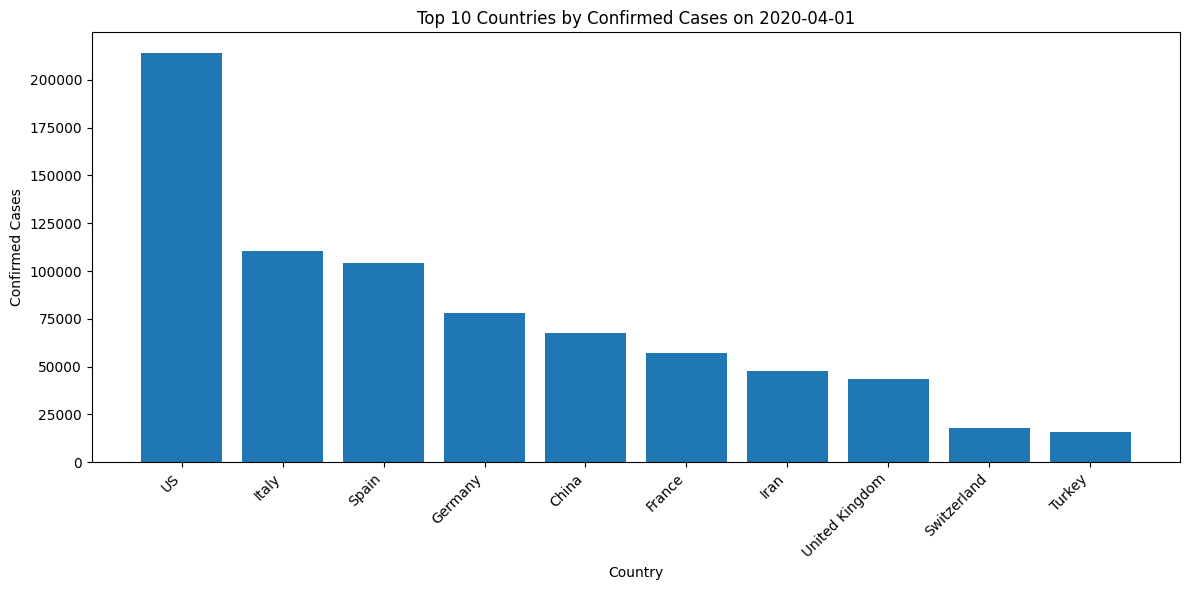

In [16]:
df_specific_date = df[df['Date'] == '2020-04-01'][['Country/Region', 'Confirmed']]
df_specific_date = df_specific_date.sort_values(by='Confirmed', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_specific_date['Country/Region'].head(10), df_specific_date['Confirmed'].head(10))
plt.title("Top 10 Countries by Confirmed Cases on 2020-04-01")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

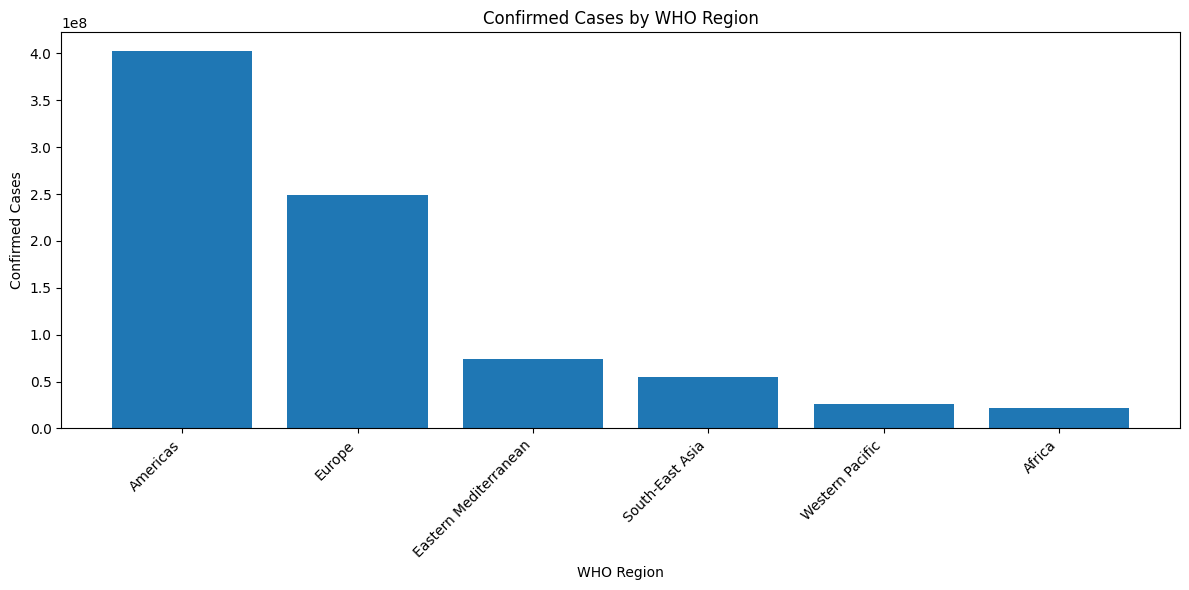

In [17]:
df_region = df.groupby('WHO Region')['Confirmed'].sum().reset_index()
df_region = df_region.sort_values(by='Confirmed', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(df_region['WHO Region'], df_region['Confirmed'])
plt.title("Confirmed Cases by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [18]:
df_mapped = df[df['Date'] == '2020-04-01'][['Date', 'Country/Region', 'Confirmed', 'Lat', 'Long']]
df_mapped.head()

,Date,Country/Region,Confirmed,Lat,Long
18270,2020-04-01,Afghanistan,237,33.93911,67.709953
18271,2020-04-01,Albania,259,41.15330,20.168300
18272,2020-04-01,Algeria,847,28.03390,1.659600
18273,2020-04-01,Andorra,390,42.50630,1.521800
18274,2020-04-01,Angola,8,-11.20270,17.873900


In [19]:
fig = px.choropleth(
    df_mapped,
    locations="Country/Region",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country/Region",
    projection="natural earth",
    title="Confirmed Cases in Selected Countries",
)
fig.show()

`7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

In [20]:
df_countries = df.groupby(['WHO Region', 'Country/Region'])['Confirmed'].sum().reset_index()
df_countries

,WHO Region,Country/Region,Confirmed
0,Africa,Algeria,1179755
1,Africa,Angola,22662
2,Africa,Benin,64406
3,Africa,Botswana,15306
4,Africa,Burkina Faso,96153
...,...,...,...
182,Western Pacific,Philippines,2972611
183,Western Pacific,Singapore,3502472
184,Western Pacific,South Korea,1647537
185,Western Pacific,Taiwan*,55593


In [21]:
df_countries['Total Confirmed'] = df_countries.groupby('WHO Region')['Confirmed'].transform('sum')
df_countries

,WHO Region,Country/Region,Confirmed,Total Confirmed
0,Africa,Algeria,1179755,21791827
1,Africa,Angola,22662,21791827
2,Africa,Benin,64406,21791827
3,Africa,Botswana,15306,21791827
4,Africa,Burkina Faso,96153,21791827
...,...,...,...,...
182,Western Pacific,Philippines,2972611,26374411
183,Western Pacific,Singapore,3502472,26374411
184,Western Pacific,South Korea,1647537,26374411
185,Western Pacific,Taiwan*,55593,26374411


In [22]:
fig = px.choropleth(
    df_countries,
    locations="Country/Region",
    locationmode="country names",
    color="Total Confirmed",
    hover_name="Country/Region",
    projection="natural earth",
    title="Confirmed Cases in Selected Countries",
)
fig.show()